In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model


In [3]:
# read data
df=pd.read_csv("assg2.csv")
df.head()

,Humidity(%),Temperature(°C),WaterFlow(%)
0,25.045045,76.856857,67.432607
1,8.880881,31.771772,0.000000
2,24.956957,75.735736,66.105904
3,40.328328,88.308308,0.000000
4,38.742743,57.157157,0.000000


In [4]:
# convert to list
Humidity = np.array(df['Humidity(%)'].to_list())
Temperature = np.array(df['Temperature(°C)'].to_list())
WaterFlow = np.array(df['WaterFlow(%)'].to_list())

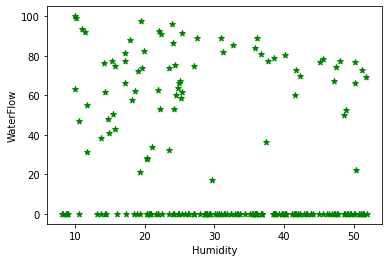

In [6]:
#plot data
plt.scatter(Humidity, WaterFlow, label= "stars", color= "green",
            marker= "*")
#plt.title("Humidity vs WaterFlow")
plt.xlabel("Humidity")
plt.ylabel("WaterFlow")
plt.show()

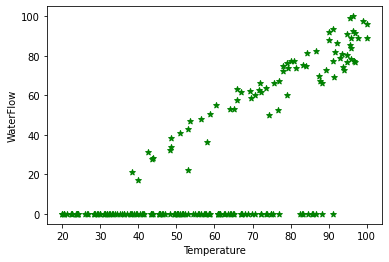

In [7]:
plt.scatter(Temperature, WaterFlow, label= "stars", color= "green",
            marker= "*")
#plt.title("Temperature vs WaterFlow")
plt.xlabel("Temperature")
plt.ylabel("WaterFlow")
plt.show()

In [8]:
## remove temp > 35 and waterflow == 0
df2 = df.copy()
df2.drop(df2[((Temperature > 35) & (WaterFlow == 0))].index, inplace = True)
df2.head()

,Humidity(%),Temperature(°C),WaterFlow(%)
0,25.045045,76.856857,67.432607
1,8.880881,31.771772,0.000000
2,24.956957,75.735736,66.105904
5,45.613614,24.164164,0.000000
7,23.415415,81.421421,73.999716


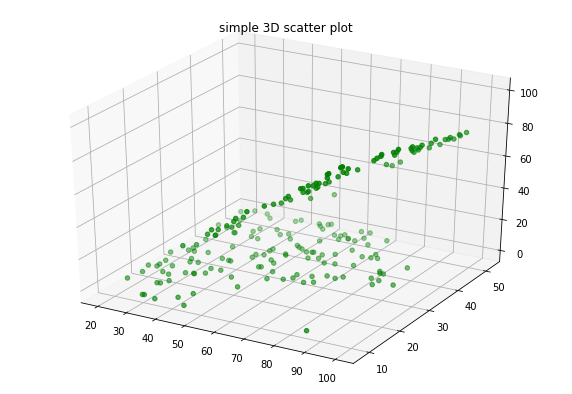

In [9]:
# 3d plot of data
# defining all 3 axes
z = WaterFlow
x = Temperature
y = Humidity
 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [10]:
# Convert data to array
data = df2.values

In [11]:
# Split data and label
x = data[:,:-1]
y = data[:,-1]

In [12]:
# Split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state = 4)

In [15]:
# Make multilayer perceptron model with 2 hidden layer. And relu as activation function
model = Sequential([
    Dense(3, activation='relu',input_shape=(2,)),
    Dense(2, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
hist = model.fit(x_train,y_train, batch_size=32, epochs=300, validation_split=0.1)

Epoch 1/300
3/3 [==============================] - 1s 58ms/step - loss: 1784.8885 - val_loss: 1351.2845
Epoch 2/300
3/3 [==============================] - 0s 11ms/step - loss: 1750.2271 - val_loss: 1324.8401
Epoch 3/300
3/3 [==============================] - 0s 11ms/step - loss: 1717.5110 - val_loss: 1298.2751
Epoch 4/300
3/3 [==============================] - 0s 12ms/step - loss: 1684.1570 - val_loss: 1271.7758
Epoch 5/300
3/3 [==============================] - 0s 12ms/step - loss: 1652.9908 - val_loss: 1245.1438
Epoch 6/300
3/3 [==============================] - 0s 12ms/step - loss: 1620.7222 - val_loss: 1218.6050
Epoch 7/300
3/3 [==============================] - 0s 15ms/step - loss: 1588.0077 - val_loss: 1192.2340
Epoch 8/300
3/3 [==============================] - 0s 14ms/step - loss: 1555.5934 - val_loss: 1166.0220
Epoch 9/300
3/3 [==============================] - 0s 14ms/step - loss: 1521.8574 - val_loss: 1140.1355
Epoch 10/300
3/3 [==============================] - 0s 12ms/step

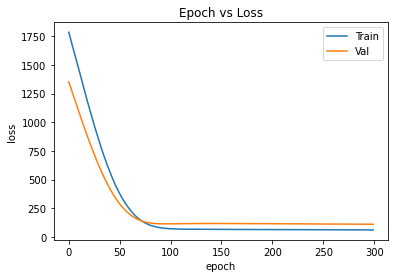

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Epoch vs Loss")
plt.legend(['Train','Val'])
plt.show()

In [17]:
# model summery
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


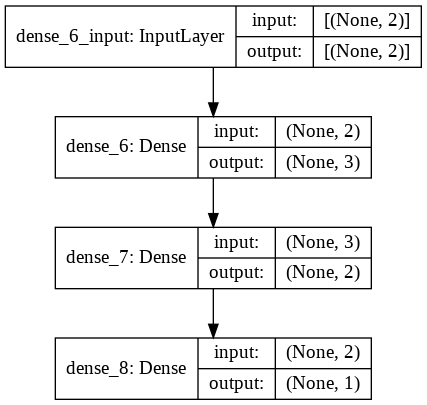

In [18]:
# model layers
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Get the trained weights of model 
weights = model.get_weights()
weights
# Its is list of array. First array is weigths of first hidden layer followed by its bias in next array. Similarly for secound hidden layer and output layer.

[array([[ 0.5534344 , -0.10727889, -0.70987916],
        [ 0.6491224 ,  1.0499377 ,  0.577512  ]], dtype=float32),
 array([-0.0261669 , -0.26340628, -0.32963908], dtype=float32),
 array([[-0.18413194,  0.5379906 ],
        [ 1.0255823 , -0.740104  ],
        [ 1.085551  ,  0.8616468 ]], dtype=float32),
 array([-0.43135253, -0.13185199], dtype=float32),
 array([[ 0.6965084],
        [-0.6874518]], dtype=float32),
 array([-0.39609757], dtype=float32)]

In [19]:
# funtion to make prediction
def predict(x):
    prediction = model.predict(x)
    prediction[prediction <= 0] = 0
    return prediction

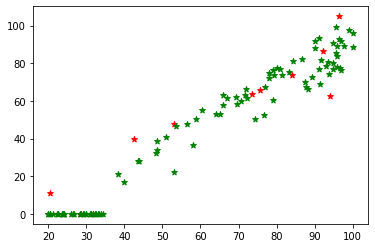

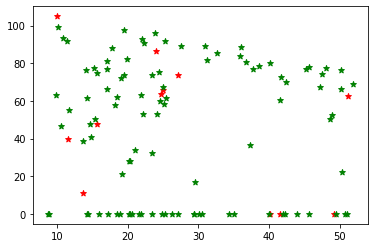

In [20]:
# make prediction
prediction = predict(x_test)

# plot graph red is prediction and green is original data
plt.scatter(x_test[:,1], prediction, label= "stars", color= "red",marker= "*")   
plt.scatter(x_train[:,1], y_train, label= "stars", color= "green",marker= "*")    
plt.show()

plt.scatter(x_test[:,0], prediction, label= "stars", color= "red",marker= "*")   
plt.scatter(x_train[:,0], y_train, label= "stars", color= "green",marker= "*")    
plt.show()
# here the red points show test examples and green points are training examples.